# IMPORT STATEMENTS

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

# Load dataset
data = pd.read_csv('LOANCSVfile.csv')


# DATA PREPROCESSING

In [2]:
# Preprocessing: Creating new features based on given conditions
data['ApplicantIncome_gt_2000'] = data['ApplicantIncome'].apply(lambda x: 1 if x > 2000 else 0)
data['CoapplicantIncome_gt_1000'] = data['CoapplicantIncome'].apply(lambda x: 1 if x > 1000 else 0)
data['LoanAmount_lt_200'] = data['LoanAmount'].apply(lambda x: 1 if x < 200 else 0)
data['Credit_History'] = data['Credit_History'].apply(lambda x: 1 if x == 1 else 0)

In [3]:
# Defining features and target variable
X = data[['ApplicantIncome_gt_2000', 'CoapplicantIncome_gt_1000', 'LoanAmount_lt_200', 'Credit_History']]
y = data['Loan_Status']

In [4]:
#  Handle missing values in both X and y
X.fillna(0, inplace=True)  # Replace NaNs in features with 0
y.dropna(inplace=True)     # Drop rows where target variable is NaN
X = X.loc[y.index]         # Keep only rows corresponding to the non-NaN target values



C:\Users\HP\AppData\Local\Temp\ipykernel_23516\2239021646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)  # Replace NaNs in features with 0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# LOGISTIC REGRESSION

In [6]:
# Logistic regression model training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
# Model predictions
y_pred = model.predict(X_test)

In [8]:
y_test_numeric = y_test.map({'Yes': 1, 'No': 0})


# ACCURACY, CONFUSSION MATRIX, CLASSIFICATION REPORT

In [9]:
import numpy as np
y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.2
y_pred_adjusted = np.where(y_prob > threshold, 1, 0)

# Evaluate the model with numeric y_test
accuracy_adjusted = accuracy_score(y_test_numeric, y_pred_adjusted)
conf_matrix_adjusted = confusion_matrix(y_test_numeric, y_pred_adjusted)
classification_rep_adjusted = classification_report(y_test_numeric, y_pred_adjusted)

print("Adjusted Accuracy:", accuracy_adjusted)
print("Adjusted Confusion Matrix:\n", conf_matrix_adjusted)
print("Adjusted Classification Report:\n", classification_rep_adjusted)

Adjusted Accuracy: 0.7142857142857143
Adjusted Confusion Matrix:
 [[39 16]
 [ 2  6]]
Adjusted Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.71      0.81        55
           1       0.27      0.75      0.40         8

    accuracy                           0.71        63
   macro avg       0.61      0.73      0.61        63
weighted avg       0.87      0.71      0.76        63



In [10]:
eligibility_status = ['Eligible' if pred == 1 else 'Not Eligible' for pred in y_pred]


In [11]:
for i, status in enumerate(eligibility_status):
    print(f"Loan Application {i+1}: {status}")

Loan Application 1: Not Eligible
Loan Application 2: Not Eligible
Loan Application 3: Not Eligible
Loan Application 4: Not Eligible
Loan Application 5: Not Eligible
Loan Application 6: Not Eligible
Loan Application 7: Not Eligible
Loan Application 8: Not Eligible
Loan Application 9: Not Eligible
Loan Application 10: Not Eligible
Loan Application 11: Not Eligible
Loan Application 12: Not Eligible
Loan Application 13: Not Eligible
Loan Application 14: Not Eligible
Loan Application 15: Not Eligible
Loan Application 16: Not Eligible
Loan Application 17: Not Eligible
Loan Application 18: Not Eligible
Loan Application 19: Not Eligible
Loan Application 20: Not Eligible
Loan Application 21: Not Eligible
Loan Application 22: Not Eligible
Loan Application 23: Not Eligible
Loan Application 24: Not Eligible
Loan Application 25: Not Eligible
Loan Application 26: Not Eligible
Loan Application 27: Not Eligible
Loan Application 28: Not Eligible
Loan Application 29: Not Eligible
Loan Application 30: No

# FUNCTION TO CHECK THE ELIGIBILITY BASED ON CONDITIONS

In [12]:
# Function to check loan eligibility based on conditions
def check_loan_eligibility(applicant_income, coapplicant_income, loan_amount, credit_history):
    """
    Check loan eligibility based on given criteria.
    """
    if (applicant_income > 2000 and
        coapplicant_income > 1000 and
        loan_amount < 200 and
        credit_history == 0):  # Credit History == 0 for eligibility
        return 'Eligible'
    else:
        return 'Not Eligible'
    # Example single data point (replace these values with actual test data)
applicant_income = 4000
coapplicant_income = 2000
loan_amount = 100
credit_history = 0

# Check loan eligibility
loan_status = check_loan_eligibility(applicant_income, coapplicant_income, loan_amount, credit_history)

# Display the result
print(f"The predicted loan status is: {loan_status}")

The predicted loan status is: Eligible


# EXPLORATORY DATA ANALYSIS

C:\Users\HP\AppData\Local\Temp\ipykernel_23516\1364925176.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Status', y='LoanAmount', data=data, palette='Set2')
C:\Users\HP\AppData\Local\Temp\ipykernel_23516\1364925176.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Status', y='ApplicantIncome', data=data, palette='Set3')
C:\Users\HP\AppData\Local\Temp\ipykernel_23516\1364925176.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=data, palette='Set1')
C:\Users\HP\AppData\Lo

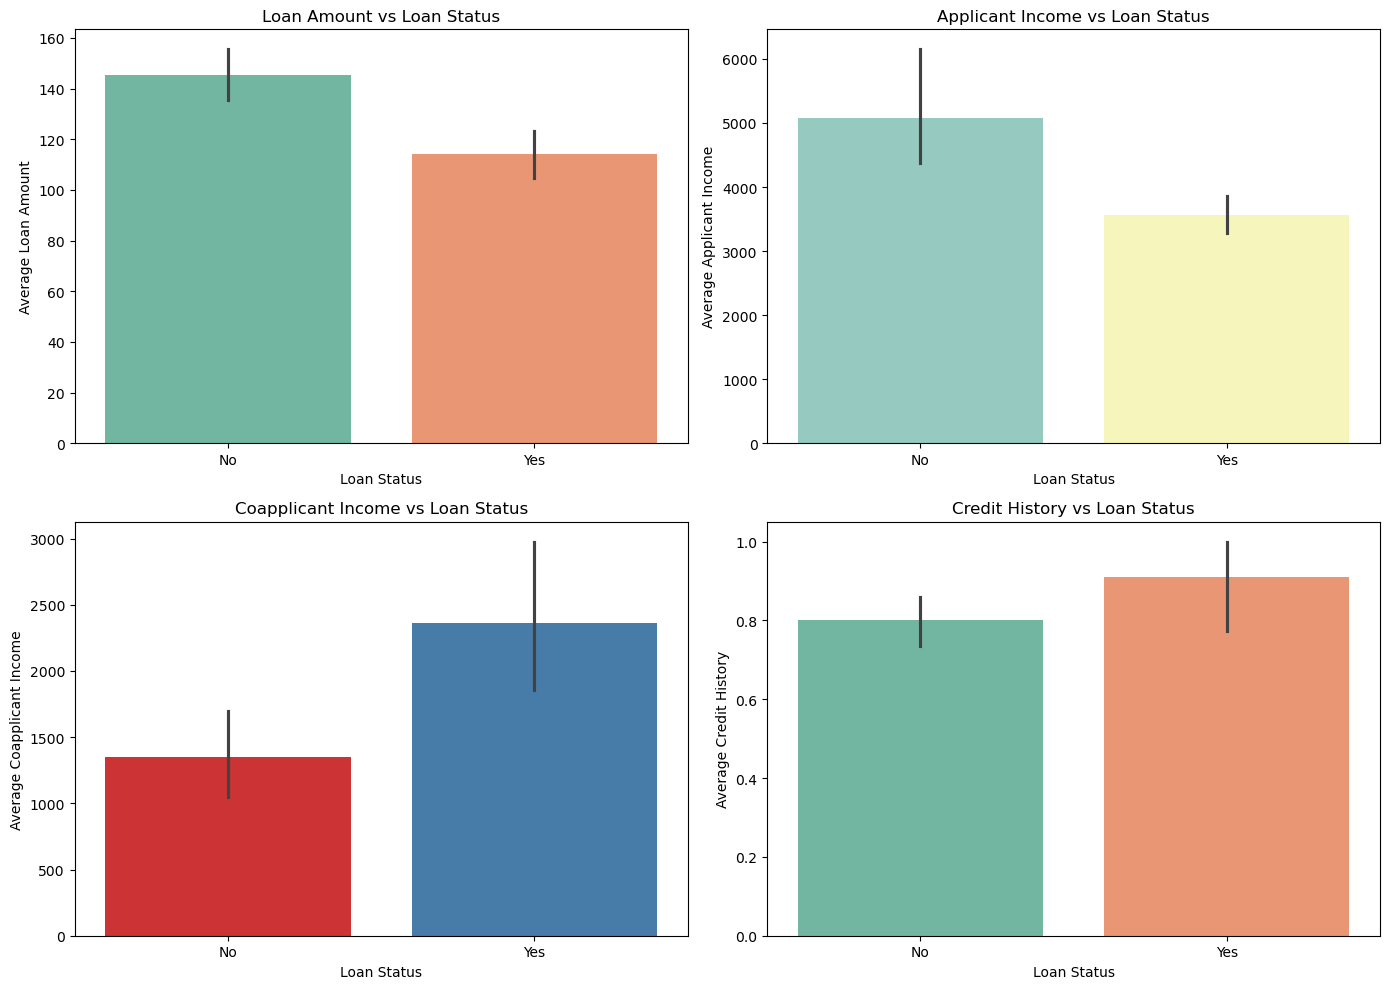

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
data = pd.read_csv('LOANCSVfile.csv')

# Convert Loan_Status to numeric values for plotting
data['Loan_Status_Numeric'] = data['Loan_Status'].map({'Yes': 1, 'No': 0})

# Set a larger figure size for all plots
plt.figure(figsize=(14, 10))

# Plot 1: LoanAmount vs Loan_Status
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, position 1
sns.barplot(x='Loan_Status', y='LoanAmount', data=data, palette='Set2')
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')

# Plot 2: ApplicantIncome vs Loan_Status
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, position 2
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=data, palette='Set3')
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Applicant Income')

# Plot 3: CoapplicantIncome vs Loan_Status
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, position 3
sns.barplot(x='Loan_Status', y='CoapplicantIncome', data=data, palette='Set1')
plt.title('Coapplicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Coapplicant Income')

# Plot 4: Credit_History vs Loan_Status
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, position 4
sns.barplot(x='Loan_Status', y='Credit_History', data=data, palette='Set2')
plt.title('Credit History vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Credit History')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


In [14]:
import pickle
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print(type(model))




<class 'sklearn.linear_model._logistic.LogisticRegression'>
